In [105]:
import pandas as pd
df=pd.read_csv("/Users/prateekb/Downloads/MyPrograms/Certification/WIP/Machine Learning/CrossValidationAndBoosting/glass.csv")

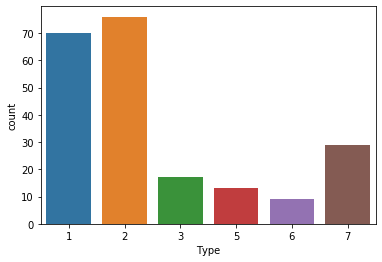

In [106]:
X=df.drop(['Type'],axis=1)
Y=df['Type']
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(Y)



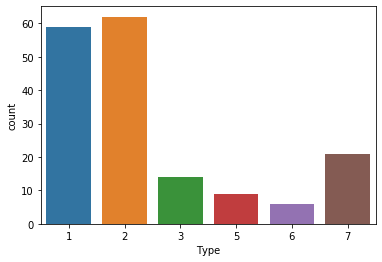

The test accuracy score is: 0.6976744186046512


In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=42)
sns.countplot(Y_train)
plt.show()


from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred=dt.predict(X_test)

from sklearn.metrics import accuracy_score
print("The test accuracy score is:",accuracy_score(Y_pred,Y_test))

In [108]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(dt,X,Y,cv=3)
accuracy[0]
for i in range(0,3):
    print("For split {} the accuracy is: {}".format(i+1,accuracy[i]))


For split 1 the accuracy is: 0.6111111111111112
For split 2 the accuracy is: 0.6619718309859155
For split 3 the accuracy is: 0.4647887323943662


In [109]:
from sklearn.ensemble import RandomForestClassifier
rt=RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

gs = GridSearchCV(estimator=rt, param_grid=param_grid, cv= 5)
gs.fit(X, Y)
gs.best_params_


{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [114]:
rt=RandomForestClassifier(criterion='entropy',max_depth=8,max_features='auto',n_estimators=200)
rt.fit(X_train,Y_train)
Y_pred=rt.predict(X_test)

from sklearn.metrics import accuracy_score
print("The test accuracy score is:",accuracy_score(Y_pred,Y_test))

The test accuracy score is: 0.8604651162790697


In [ ]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
